In [1]:
!pip install xgboost

In [0]:
from google.colab import files

In [143]:
uploaded = files.upload()

Saving PREPDATA.csv to PREPDATA (2).csv


In [0]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,12]

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

pd.options.display.max_columns = None

In [145]:
df = pd.read_csv('PREPDATA (2).csv')
df.head()

,Serial Number,BSC Indicator,Resigned,Is MPT,Is Re-Entry,Exp at Action,Age at Action,SUP Is MPT,SUP Exp at Action,SUP Age at Action,Is SUP,SUP Gender_F,SUP Gender_M,Gender_F,Gender_M,SUP Older Than EMP,Age Diff SUPvsEMP,EduAllowFinishedIn1y,EduAllowYearDiff,EDU Allowance,House Loan,Is STEM,MAX Degree,Year After Grad,count3M,days3M,count1Y,days1Y,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation
0,1,0,0,1,0,43.335592,60.091583,1.0,17.172153,44.838703,0.0,1,0,1,0,0,-15.252880,NaN,NaN,0.0,0.0,0.0,1.0,45.419139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,6,0,0,0,0,38.336174,60.674757,1.0,20.673936,53.175630,0.0,0,1,0,1,0,-7.499127,NaN,NaN,0.0,0.0,0.0,1.0,47.420549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,11,0,0,1,0,36.835801,59.921833,1.0,31.083458,57.249636,0.0,1,0,0,1,0,-2.672197,NaN,NaN,0.0,0.0,0.0,2.0,8.837964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,13,0,0,0,0,40.753746,60.255857,1.0,14.004394,42.670281,0.0,1,0,0,1,0,-17.585577,NaN,NaN,0.0,0.0,0.0,1.0,43.669617,1.0,2.0,11.0,16.0,0.0,0.0,0.0,0.0,0.0,1.454545
4,18,0,0,1,0,34.505842,61.340069,1.0,18.420638,41.506670,0.0,1,0,0,1,0,-19.833398,NaN,NaN,0.0,0.0,1.0,1.0,38.667461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [0]:
X = df.drop('Resigned',axis=1)
X = X.drop('Serial Number',axis=1)
y = df['Resigned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [0]:
gbm = xgb.XGBClassifier(

        max_depth=7,
        learning_rate=0.05,
        n_estimators=300
    
      ).fit(X_train, y_train)

In [148]:
predictions = gbm.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [149]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.93      0.90      0.92       905
          1       0.86      0.91      0.88       621

avg / total       0.90      0.90      0.90      1526



In [150]:
print(confusion_matrix(y_test,predictions))

[[814  91]
 [ 58 563]]


Text(0,0.5,'Frequency')

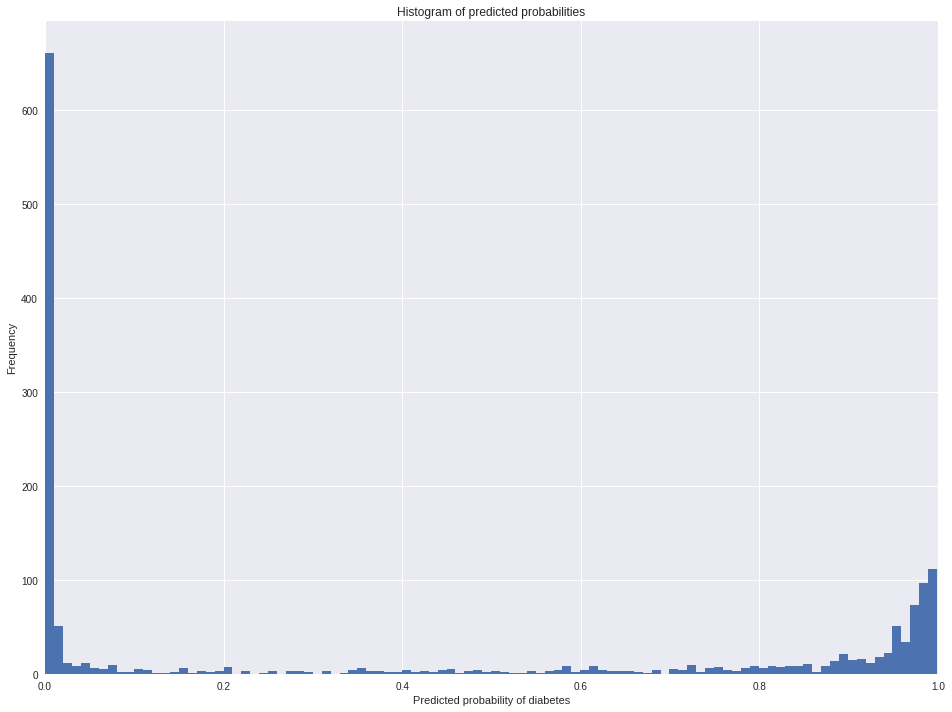

In [151]:
gbm_pred_prob = gbm.predict_proba(X_test)[:, 1]
plt.hist(gbm_pred_prob, bins=100)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

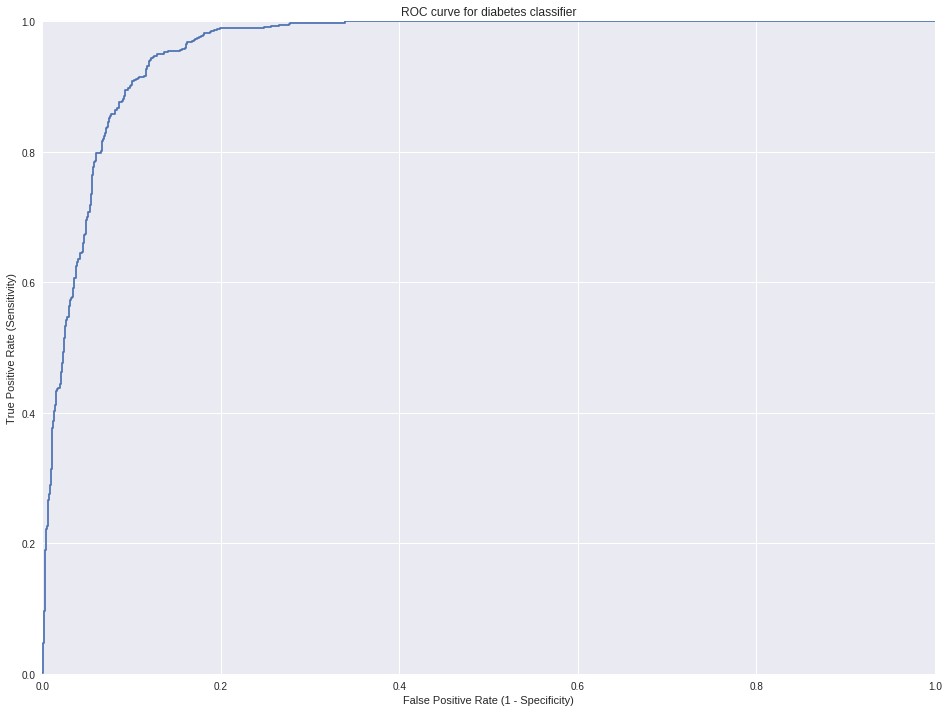

In [152]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, gbm_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [153]:
from sklearn.model_selection import cross_val_score
cross_val_score(gbm, X, y, cv=10, scoring='roc_auc').mean()

0.9208832934310893

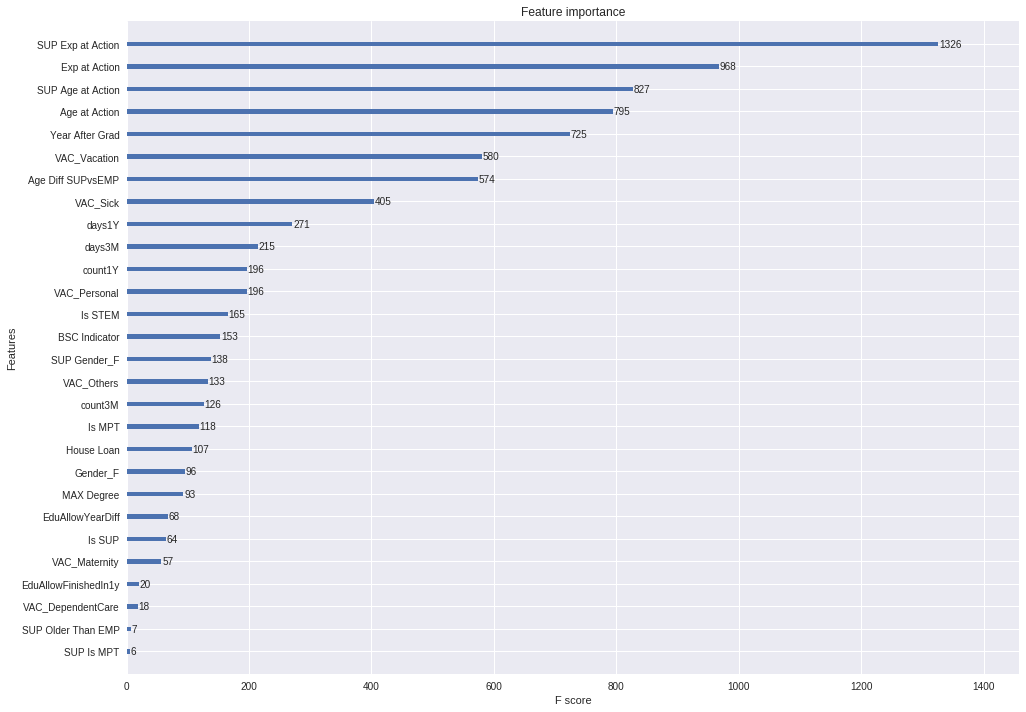

In [154]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model no training data
model = XGBClassifier(
        max_depth=7,
        learning_rate=0.05,
        n_estimators=300
)
model.fit(X, y)
# plot feature importance
plot_importance(model)

plt.show()

def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

#Choose all predictors except target & IDcols
predictors = [x for x in X_train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)